You will have to import five different datasets. Each one is an exchange traded fund (etf) offered by Vanguard that hold a collection of securities (stocks). You could technically buy one of these and own all the businesses that are part of that etf. Pretty cool.

The composition of each etf is market capitalization weighted. That means that the bigger the company is in terms of market value (think Apple with its trillion dollar market cap), the more of your dollars that you invest in that etf goes to this one stock. That is shown below.

![Large companies dominate...](large-companies-dominate-total-stock-market-index.png)

But you don't want that. What you want is this...

![A more proportional portfolio...](spreading-your-dollars-across-all-size-companies.png)

Let's explore one of those etfs.

In [33]:
import pandas as pd
vti=pd.read_csv('vti_12_31_2019.csv')
vti.drop(['Unnamed: 0', 'date'], axis = 1, inplace = True)
vti.head(10)

,holding,marketValue
0,Microsoft Corp.,3.388885e+10
1,Apple Inc.,3.307893e+10
2,Amazon.com Inc.,2.193640e+10
3,Facebook Inc.,1.391406e+10
4,Berkshire Hathaway Inc.,1.208788e+10
5,JPMorgan Chase & Co.,1.157386e+10
6,Alphabet Inc.,1.129601e+10
7,Alphabet Inc. Class C,1.100778e+10
8,Johnson & Johnson,1.081596e+10
9,Visa Inc.,9.063540e+09


In [34]:
vti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550 entries, 0 to 3549
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   holding      3550 non-null   object 
 1   marketValue  3550 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.6+ KB


So these are the top ten holdings within this etf. The marketValue column for each holding tells us the amount of money that goes towards that holding if we were to make an investment in this etf. To find % ownership for each holding, you can divide the marketValue for that holding with the total sum of marketValues for all holdings in that etf.

A brief discreption on the etfs...

[VTI](https://investor.vanguard.com/etf/profile/VTI) - Total stock market etf. It technically owns all the publicly traded companies in these United States.

[VO](https://investor.vanguard.com/etf/profile/vo) - Mid-size company etf. It owns companies that are not too larger or small.

[VB](https://investor.vanguard.com/etf/profile/vb) - Small-size company etf. It owns companies that are small in market value.

[VOO](https://investor.vanguard.com/etf/profile/voo) - These are all the companies that are part of the S&P 500 index. This is basically a large cap index and almost all companies within this are also found in VTI.

[VXF](https://investor.vanguard.com/etf/profile/vxf) - These are all the companies that are part of VTI but excluding those that are found in the S&P 500 index. Which means VXF + VOO = VTI.

In [35]:
vo=pd.read_csv('vo_12_31_2019.csv')
vo.drop(['Unnamed: 0', 'date'], axis = 1, inplace = True)
df2=vo[0:10]
vo.head()

,holding,marketValue
0,Newmont Goldcorp Corp.,896765462.0
1,Amphenol Corp. Class A,807963791.0
2,ONEOK Inc.,787016807.0
3,WEC Energy Group Inc.,732058286.0
4,IHS Markit Ltd.,722329137.0


In [36]:
vo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   holding      339 non-null    object 
 1   marketValue  339 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.4+ KB


In [37]:
vb=pd.read_csv('vb_12_31_2019.csv')
vb.drop(['Unnamed: 0', 'date'], axis = 1, inplace = True)
vb.head()

,holding,marketValue
0,Leidos Holdings Inc.,347521932.0
1,Zebra Technologies Corp.,344245760.0
2,Atmos Energy Corp.,334201885.0
3,IDEX Corp.,327868292.0
4,STERIS plc,322979504.0


In [38]:
voo=pd.read_csv('voo_12_31_2019.csv')
voo.drop(['Unnamed: 0', 'date'], axis = 1, inplace = True)
voo.head()

,holding,marketValue
0,Apple Inc.,2.450349e+10
1,Microsoft Corp.,2.403557e+10
2,Amazon.com Inc.,1.537491e+10
3,Facebook Inc. Class A,9.868079e+09
4,JPMorgan Chase & Co.,8.651537e+09


In [39]:
vxf=pd.read_csv('vxf_12_31_2019.csv')
vxf.drop(['Unnamed: 0', 'date'], axis = 1, inplace = True)
vxf.head()

,holding,marketValue
0,Tesla Inc.,844923272.0
1,Blackstone Group LP,524426088.0
2,Lululemon Athletica Inc.,393325388.0
3,Workday Inc. Class A,359631265.0
4,Palo Alto Networks Inc.,321314013.0


### Question 1

Say you had a 100 dollars to invest and you were to split that equally between these 5 etfs. How will your money be divvied up between the companies within that combined portfolio (hint: use merge in combining datasets). 

- What portion of your money will go to the top 50 companies?
- What portion to the next 450 companies?
- And what to the remaining set of companies?

Visualizations come in handy but are not necessary. Be as creative as possible. There might be overlap in holdings between etfs and you might have to use regular expressions to clean some things out to match holdings.

Approach:
Merge all data set based on holding. 

Clean:
Remove the columns 'Unnamed:0' and 'date'

Check:
Merge 2 data sets with e.g. Apple and see whether the marketValue is merged or a new column? 
Result: There is only one marketValue. 
Resolution: rename vti['marketValie'] to 'vti_marketValue'. When merging the data frames, rename the marketValue to eft_marketValue

Assumption: 
The company names used the same spelling in all data sets

In [40]:
# 1 create a copy of vti
df=vti.copy() 
df.rename(columns={"marketValue": "vti_marketValue"}, inplace = True)
df1=df[0:10]
df

,holding,vti_marketValue
0,Microsoft Corp.,3.388885e+10
1,Apple Inc.,3.307893e+10
2,Amazon.com Inc.,2.193640e+10
3,Facebook Inc.,1.391406e+10
4,Berkshire Hathaway Inc.,1.208788e+10
...,...,...
3545,Jones Energy Inc. Class A,8.000000e+00
3546,THESTREET Inc. CVR1,2.000000e+00
3547,Harvest Natural Resources Inc.,1.000000e+00
3548,Universal Travel Group,0.000000e+00


In [41]:
# 2 Merge vti with vo 
df=df.merge(vo, how='outer')
df.rename(columns={"marketValue": "vo_marketValue"}, inplace = True)
df

,holding,vti_marketValue,vo_marketValue
0,Microsoft Corp.,3.388885e+10,NaN
1,Apple Inc.,3.307893e+10,NaN
2,Amazon.com Inc.,2.193640e+10,NaN
3,Facebook Inc.,1.391406e+10,NaN
4,Berkshire Hathaway Inc.,1.208788e+10,NaN
...,...,...,...
3581,Liberty Broadband Corp. Class A,NaN,79723009.0
3582,Hyatt Hotels Corp. Class A,NaN,78324904.0
3583,Carvana Co. Class A,NaN,58196403.0
3584,Lennar Corp. Class B,NaN,9520251.0


In [42]:
# 3 Merge vti, vo  with vb
df=df.merge(vb, how='outer')
df.rename(columns={"marketValue": "vb_marketValue"}, inplace = True)
df

,holding,vti_marketValue,vo_marketValue,vb_marketValue
0,Microsoft Corp.,3.388885e+10,NaN,NaN
1,Apple Inc.,3.307893e+10,NaN,NaN
2,Amazon.com Inc.,2.193640e+10,NaN,NaN
3,Facebook Inc.,1.391406e+10,NaN,NaN
4,Berkshire Hathaway Inc.,1.208788e+10,NaN,NaN
...,...,...,...,...
3705,Revlon Inc. Class A,NaN,NaN,3375663.0
3706,SecureWorks Corp. Class A,NaN,NaN,3071588.0
3707,Associated Capital Group Inc. Class A,NaN,NaN,2500921.0
3708,Greenlight Capital Re Ltd. Class A,NaN,NaN,2062400.0


In [43]:
# 4 Merge vti, vo, vb with voo
df=df.merge(voo, how='outer')
df.rename(columns={"marketValue": "voo_marketValue"}, inplace = True)
df

,holding,vti_marketValue,vo_marketValue,vb_marketValue,voo_marketValue
0,Microsoft Corp.,3.388885e+10,NaN,NaN,2.403557e+10
1,Apple Inc.,3.307893e+10,NaN,NaN,2.450349e+10
2,Amazon.com Inc.,2.193640e+10,NaN,NaN,1.537491e+10
3,Facebook Inc.,1.391406e+10,NaN,NaN,NaN
4,Berkshire Hathaway Inc.,1.208788e+10,NaN,NaN,NaN
...,...,...,...,...,...
3722,Marriott International Inc./MD Class A,NaN,NaN,NaN,8.209544e+08
3723,Cognizant Technology Solutions Corp. Class A,NaN,NaN,NaN,6.784981e+08
3724,LyondellBasell Industries NV Class A,NaN,NaN,NaN,4.845976e+08
3725,Republic Services Inc. Class A,NaN,NaN,NaN,3.771746e+08


In [44]:
# 5 Merge vti, vo, vb, voo with vxf
df=df.merge(vxf, how='outer')
df.rename(columns={"marketValue": "vxf_marketValue"}, inplace = True)
df

,holding,vti_marketValue,vo_marketValue,vb_marketValue,voo_marketValue,vxf_marketValue
0,Microsoft Corp.,3.388885e+10,NaN,NaN,2.403557e+10,NaN
1,Apple Inc.,3.307893e+10,NaN,NaN,2.450349e+10,NaN
2,Amazon.com Inc.,2.193640e+10,NaN,NaN,1.537491e+10,NaN
3,Facebook Inc.,1.391406e+10,NaN,NaN,NaN,NaN
4,Berkshire Hathaway Inc.,1.208788e+10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4076,Nephros Inc.,NaN,NaN,NaN,NaN,995.0
4077,Priority Technology Holdings Inc.,NaN,NaN,NaN,NaN,260.0
4078,Cohen & Co. Inc.,NaN,NaN,NaN,NaN,253.0
4079,InnSuites Hospitality Trust,NaN,NaN,NaN,NaN,165.0


In [45]:
# Replace NaN with 0.0
df['vti_marketValue']=df['vti_marketValue'].fillna(0.0)
df['vo_marketValue']=df['vo_marketValue'].fillna(0.0)
df['vb_marketValue']=df['vb_marketValue'].fillna(0.0)
df['voo_marketValue']=df['voo_marketValue'].fillna(0.0)
df['vxf_marketValue']=df['vxf_marketValue'].fillna(0.0)
df

,holding,vti_marketValue,vo_marketValue,vb_marketValue,voo_marketValue,vxf_marketValue
0,Microsoft Corp.,3.388885e+10,0.0,0.0,2.403557e+10,0.0
1,Apple Inc.,3.307893e+10,0.0,0.0,2.450349e+10,0.0
2,Amazon.com Inc.,2.193640e+10,0.0,0.0,1.537491e+10,0.0
3,Facebook Inc.,1.391406e+10,0.0,0.0,0.000000e+00,0.0
4,Berkshire Hathaway Inc.,1.208788e+10,0.0,0.0,0.000000e+00,0.0
...,...,...,...,...,...,...
4076,Nephros Inc.,0.000000e+00,0.0,0.0,0.000000e+00,995.0
4077,Priority Technology Holdings Inc.,0.000000e+00,0.0,0.0,0.000000e+00,260.0
4078,Cohen & Co. Inc.,0.000000e+00,0.0,0.0,0.000000e+00,253.0
4079,InnSuites Hospitality Trust,0.000000e+00,0.0,0.0,0.000000e+00,165.0


In [46]:
# Create marketValue column sum 
vti_sum=df['vti_marketValue'].sum(axis=0)
vo_sum= df['vo_marketValue' ].sum(axis=0)
vb_sum= df['vb_marketValue' ].sum(axis=0)
voo_sum=df['voo_marketValue'].sum(axis=0)
vxf_sum=df['vxf_marketValue'].sum(axis=0)

In [47]:
(df['vti_marketValue'][0]/(vti_sum) + df['vo_marketValue'][0]/(vo_sum) + df['vb_marketValue'][0]/(vb_sum) + df['voo_marketValue'][0]/(voo_sum) + df['vxf_marketValue'][0]/(vxf_sum))/5

0.01656608227240875

In [48]:
# Create a new columns with the % of the total column value
df['vti_share']=df['vti_marketValue']/vti_sum
df['vo_share'] =df['vo_marketValue']/vo_sum
df['vb_share'] =df['vb_marketValue']/vb_sum
df['voo_share']=df['voo_marketValue']/voo_sum
df['vxf_share']=df['vxf_marketValue']/vxf_sum
df

,holding,vti_marketValue,vo_marketValue,vb_marketValue,voo_marketValue,vxf_marketValue,vti_share,vo_share,vb_share,voo_share,vxf_share
0,Microsoft Corp.,3.388885e+10,0.0,0.0,2.403557e+10,0.0,0.037868,0.0,0.0,0.044962,0.000000e+00
1,Apple Inc.,3.307893e+10,0.0,0.0,2.450349e+10,0.0,0.036963,0.0,0.0,0.045838,0.000000e+00
2,Amazon.com Inc.,2.193640e+10,0.0,0.0,1.537491e+10,0.0,0.024512,0.0,0.0,0.028761,0.000000e+00
3,Facebook Inc.,1.391406e+10,0.0,0.0,0.000000e+00,0.0,0.015548,0.0,0.0,0.000000,0.000000e+00
4,Berkshire Hathaway Inc.,1.208788e+10,0.0,0.0,0.000000e+00,0.0,0.013507,0.0,0.0,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
4076,Nephros Inc.,0.000000e+00,0.0,0.0,0.000000e+00,995.0,0.000000,0.0,0.0,0.000000,1.338054e-08
4077,Priority Technology Holdings Inc.,0.000000e+00,0.0,0.0,0.000000e+00,260.0,0.000000,0.0,0.0,0.000000,3.496423e-09
4078,Cohen & Co. Inc.,0.000000e+00,0.0,0.0,0.000000e+00,253.0,0.000000,0.0,0.0,0.000000,3.402289e-09
4079,InnSuites Hospitality Trust,0.000000e+00,0.0,0.0,0.000000e+00,165.0,0.000000,0.0,0.0,0.000000,2.218884e-09


In [49]:
# Create a new columns with the % of the total column value
df['total_share'] = (df['vti_share'] + df['vo_share'] + df['vb_share'] + df['voo_share'] + df['vxf_share'])/5
df

,holding,vti_marketValue,vo_marketValue,vb_marketValue,voo_marketValue,vxf_marketValue,vti_share,vo_share,vb_share,voo_share,vxf_share,total_share
0,Microsoft Corp.,3.388885e+10,0.0,0.0,2.403557e+10,0.0,0.037868,0.0,0.0,0.044962,0.000000e+00,1.656608e-02
1,Apple Inc.,3.307893e+10,0.0,0.0,2.450349e+10,0.0,0.036963,0.0,0.0,0.045838,0.000000e+00,1.656014e-02
2,Amazon.com Inc.,2.193640e+10,0.0,0.0,1.537491e+10,0.0,0.024512,0.0,0.0,0.028761,0.000000e+00,1.065467e-02
3,Facebook Inc.,1.391406e+10,0.0,0.0,0.000000e+00,0.0,0.015548,0.0,0.0,0.000000,0.000000e+00,3.109559e-03
4,Berkshire Hathaway Inc.,1.208788e+10,0.0,0.0,0.000000e+00,0.0,0.013507,0.0,0.0,0.000000,0.000000e+00,2.701438e-03
...,...,...,...,...,...,...,...,...,...,...,...,...
4076,Nephros Inc.,0.000000e+00,0.0,0.0,0.000000e+00,995.0,0.000000,0.0,0.0,0.000000,1.338054e-08,2.676109e-09
4077,Priority Technology Holdings Inc.,0.000000e+00,0.0,0.0,0.000000e+00,260.0,0.000000,0.0,0.0,0.000000,3.496423e-09,6.992846e-10
4078,Cohen & Co. Inc.,0.000000e+00,0.0,0.0,0.000000e+00,253.0,0.000000,0.0,0.0,0.000000,3.402289e-09,6.804577e-10
4079,InnSuites Hospitality Trust,0.000000e+00,0.0,0.0,0.000000e+00,165.0,0.000000,0.0,0.0,0.000000,2.218884e-09,4.437768e-10


In [50]:
# Create a data frame 'short_list' with just holding and tota_share. Sort it by total_share inplace. 
short_list=df.loc[:,['holding', 'total_share']]
short_list.sort_values(by = 'total_share', ascending = False, inplace = True)

In [51]:
short_list[0:50].sum()

holding        Microsoft Corp.Apple Inc.Amazon.com Inc.JPMorg...
total_share                                             0.179922
dtype: object

In [52]:
short_list[51:500].sum()

holding        Accenture plc Class AONEOK Inc.Philip Morris I...
total_share                                             0.433125
dtype: object

In [53]:
short_list[501:].sum()

holding        United Parcel Service Inc. Class BWalgreens Bo...
total_share                                             0.384489
dtype: object

In [54]:
# Calculate the largecap, midcap, and smallcap sum
largecap=short_list[0:50]['total_share'].sum()
midcap=short_list[51:500]['total_share'].sum()
smallcap=short_list[501:]['total_share'].sum()
distribution=pd.DataFrame(columns=['Largecap', 'Midcap', 'Smallcap'], index = [0])
distribution.iloc[0,:]=[largecap, midcap, smallcap]
distribution

,Largecap,Midcap,Smallcap
0,0.179922,0.433125,0.384489


#### Question 1 Plotting the result

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
distribution.columns

Index(['Largecap', 'Midcap', 'Smallcap'], dtype='object')

In [57]:
distribution.iloc[0,:].values

array([0.17992194779817133, 0.4331249341696862, 0.3844893615603132],
      dtype=object)

https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

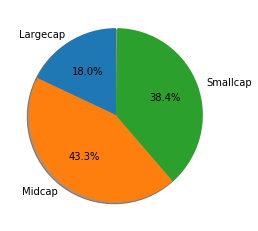

In [58]:
fig1, ax1 = plt.subplots()
ax1.pie(distribution.iloc[0,:].values, labels=distribution.columns, autopct='%1.1f%%',
        shadow=True, startangle=90);

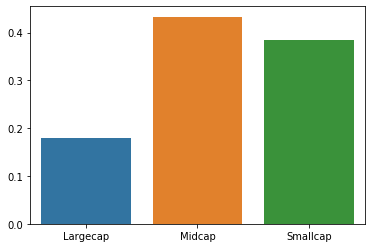

In [59]:
sns.barplot(distribution.columns, distribution.iloc[0,:].values)

#### Draw the first 50 Largecap, first 50 Midcap, and first 50 Smallcap in a graph.

In [60]:
df_large=short_list[0:49].copy()
df_mid=short_list[50:99].copy()
df_small=short_list[500:549].copy()
print(len(df_large), len(df_mid), len(df_small))

49 49 49


In [61]:
df_small['total_share']

680     0.000614
3721    0.000613
141     0.000612
479     0.000609
143     0.000609
475     0.000609
477     0.000608
3594    0.000608
478     0.000608
502     0.000608
676     0.000606
670     0.000605
672     0.000604
481     0.000604
671     0.000603
675     0.000603
144     0.000603
145     0.000603
483     0.000603
485     0.000602
487     0.000597
689     0.000597
678     0.000597
686     0.000596
684     0.000596
509     0.000596
668     0.000595
515     0.000595
682     0.000595
679     0.000594
3722    0.000593
490     0.000593
692     0.000592
683     0.000592
148     0.000588
154     0.000588
395     0.000587
498     0.000586
693     0.000585
491     0.000585
149     0.000584
493     0.000584
497     0.000583
150     0.000583
3573    0.000581
147     0.000581
503     0.000581
690     0.000581
153     0.000581
Name: total_share, dtype: float64

Text(0, 0.5, 'Company Count')

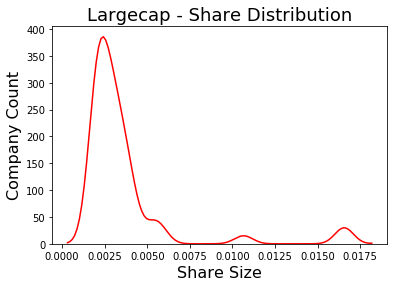

In [62]:
sns.distplot(df_large['total_share'], color = 'red', hist = False)
plt.title('Largecap - Share Distribution', fontsize=18)
plt.xlabel('Share Size', fontsize=16)
plt.ylabel('Company Count', fontsize=16)

Text(0, 0.5, 'Company Count')

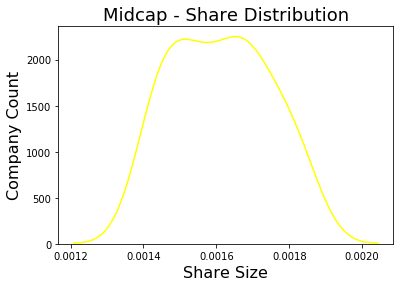

In [63]:
sns.distplot(df_mid['total_share'], color = 'yellow', hist = False)
plt.title('Midcap - Share Distribution', fontsize=18)
plt.xlabel('Share Size', fontsize=16)
plt.ylabel('Company Count', fontsize=16)

Text(0, 0.5, 'Company Count')

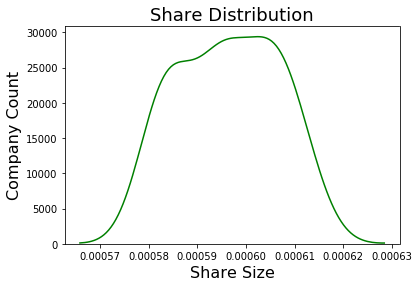

In [64]:
sns.distplot(df_small['total_share'], color = 'green', hist = False)
plt.title('Share Distribution', fontsize=18)
plt.xlabel('Share Size', fontsize=16)
plt.ylabel('Company Count', fontsize=16)

Comment: What are the numbers on the Y-axis? That can not be Company Count or Index. 

### Question 2

Try some other proportions out in how you will divvy up your portfolio to get broader exposure to more mid and small size companies. Provide your best allocation and state the reasons why. This is a more open-ended question so be as creative as possible.

Assumption: 
   - The first 50 companies in the total etf mix are largecap companies
   - The next 450 (51-500) companies in the total etf mix are midcap companies
   - The remaining (501-eof) companides in the total etf mix are smallcap companies. 

Task:
    - Find a mix where the largecap, midcap, and smallcap have an equal share of 1/3

Approach:
    - start simple: use multiples of 10% for each etf
    - create all etf permutations: 0, 0, 0, 0, 100 - 0, 0, 0, 10, 90, - 0, 0, 0, 20, 80 - .. 
    - 

In [65]:
limit=10
count=1
for i in range(limit+1):
    for j in range(limit+1):
        for k in range(limit+1):
            for l in range(limit+1):
                for m in range(limit+1):
                    if (i+j+k+l+m != limit):
                        continue
                    else:
                        #print(count, 'vti: ', i, 'j: ', j, 'k: ', k, 'l: ', l, 'm: ', m)
                        count+=1
print(count-1)  

# count - permutation includes records:
# 1 - 5 
# 2 - 15   ->  
# 3 - 35   -> 
# 4 - 70
# 5 - 126 
# 6 - 210
# 10 - 1001
#
# A pentatope number is a number in the fifth cell of any row of Pascal's triangle 
# starting with the 5-term row 1 4 6 4 1 either from left to right or from right to left. 
# The first few numbers of this kind are: 1, 5, 15, 35, 70, 126, 210, 330, 495, 715, 1001, 1365 
# (sequence A000332 in the OEIS)
# https://en.wikipedia.org/wiki/Pentatope_number#:~:text=A%20pentatope%20number%20is%20a,sequence%20A000332%20in%20the%20OEIS)
    

1001


In [66]:
def pentalope(limit):
    count=1
    for i in range(limit+1):
        for j in range(limit+1):
            for k in range(limit+1):
                for l in range(limit+1):
                    for m in range(limit+1):
                        if (i+j+k+l+m != limit):
                            continue
                        else:
                            #print(count, 'vti: ', i, 'j: ', j, 'k: ', k, 'l: ', l, 'm: ', m)
                            count+=1
    return(count-1)

In [67]:
print(pentalope(10))

1001


In [68]:
limit=10
cnt=0
for i in range(limit+1):
    for j in range(limit+1):
        for k in range(limit+1):
            for l in range(limit+1):
                for m in range(limit+1):
                    if (i+j+k+l+m != limit):
                        continue
                    else:
                        #print(cnt, 'i: ', i, 'j: ', j, 'k: ', k, 'l: ', l, 'm: ', m)
                        
                        # 1 create a copy of vti
                        df=vti.copy() 
                        df.rename(columns={"marketValue": "vti_marketValue"}, inplace = True)
                        df["vti_marketValue"]=i*df["vti_marketValue"]
                        
                        # 2 Merge vti with vo
                        df=df.merge(vo, how='outer')
                        df.rename(columns={"marketValue": "vo_marketValue"}, inplace = True)
                        df["vo_marketValue"]=j*df["vo_marketValue"]
                        
                        # 3 Merge vti, vo with vb
                        df=df.merge(vb, how='outer')
                        df.rename(columns={"marketValue": "vb_marketValue"}, inplace = True)
                        df["vb_marketValue"]=k*df["vb_marketValue"]
                        
                        # 4 Merge vti, vo, vb with voo
                        df=df.merge(voo, how='outer')
                        df.rename(columns={"marketValue": "voo_marketValue"}, inplace = True)
                        df["voo_marketValue"]=l*df["voo_marketValue"]
                        
                        # 5 Merge vti, vo, vb, voo with vxf
                        df=df.merge(vxf, how='outer')
                        df.rename(columns={"marketValue": "vxf_marketValue"}, inplace = True)
                        df["vxf_marketValue"]=m*df["vxf_marketValue"]
                        
                        # Replace NaN with 0.0
                        df['vti_marketValue']=df['vti_marketValue'].fillna(0.0)
                        df['vo_marketValue']=df['vo_marketValue'].fillna(0.0)
                        df['vb_marketValue']=df['vb_marketValue'].fillna(0.0)
                        df['voo_marketValue']=df['voo_marketValue'].fillna(0.0)
                        df['vxf_marketValue']=df['vxf_marketValue'].fillna(0.0)
                        
                        # Create marketValue column sum 
                        vti_sum=df['vti_marketValue'].sum(axis=0)
                        vo_sum= df['vo_marketValue' ].sum(axis=0)
                        vb_sum= df['vb_marketValue' ].sum(axis=0)
                        voo_sum=df['voo_marketValue'].sum(axis=0)
                        vxf_sum=df['vxf_marketValue'].sum(axis=0)
                        
                        # Create a new columns with the % of the total column value
                        df['vti_share']=df['vti_marketValue']/vti_sum
                        df['vo_share'] =df['vo_marketValue']/vo_sum
                        df['vb_share'] =df['vb_marketValue']/vb_sum
                        df['voo_share']=df['voo_marketValue']/voo_sum
                        df['vxf_share']=df['vxf_marketValue']/vxf_sum
                        
                        # The column sum might be 0 and creating a NaN in the *_marketValue column. Set it to 0
                        df['vti_share']=df['vti_share'].fillna(0.0)
                        df['vo_share']=df['vo_share'].fillna(0.0)
                        df['vb_share']=df['vb_share'].fillna(0.0)
                        df['voo_share']=df['voo_share'].fillna(0.0)
                        df['vxf_share']=df['vxf_share'].fillna(0.0)
                        
                        # Create a new columns with the % of the total column value
                        df['total_share'] = (i*df['vti_share'] + j*df['vo_share'] + k*df['vb_share'] + l*df['voo_share'] + m*df['vxf_share'])/limit
                        
                        # Create a data frame 'short_list' with just holding and tota_share. Sort it by total_share inplace. 
                        short_list=df.loc[:,['holding', 'total_share']]
                        short_list.sort_values(by = 'total_share', ascending = False, inplace = True)
                        
                        # Calculate the largecap, midcap, and smallcap sum
                        largecap=short_list[0:50]['total_share'].sum()
                        midcap=short_list[51:500]['total_share'].sum()
                        smallcap=short_list[501:]['total_share'].sum()
                        #print(largecap, midcap, smallcap, i, j, k, l, m)
                        if(cnt==0):
                            distribution=pd.DataFrame(columns=['Largecap', 'Midcap', 'Smallcap', 'vti_factor', 'vo_factor', 'vb_factor', 'voo_factor', 'vxf_factor'], index = range(pentalope(limit)))
                        distribution.iloc[cnt,:]=[largecap, midcap, smallcap, i, j, k, l, m]
                        #distribution.iloc[0,:]=[largecap, midcap, smallcap]
                        
                        cnt+=1
                        
#df
#short_list
print(pentalope(limit))
# although pentalope(10)=1001 and distribution=pd.Dataframe should create only 1001 lines, it creates 4081
distribution.dropna(axis=0, inplace=True)
distribution

1001


,Largecap,Midcap,Smallcap,vti_factor,vo_factor,vb_factor,voo_factor,vxf_factor
0,0.156787,0.47922,0.361297,0,0,0,0,10
1,0.147385,0.448163,0.401945,0,0,0,1,9
2,0.1548,0.433759,0.408915,0,0,0,2,8
3,0.181069,0.417371,0.399061,0,0,0,3,7
4,0.216148,0.405898,0.375315,0,0,0,4,6
...,...,...,...,...,...,...,...,...
996,0.383798,0.401965,0.210475,9,0,0,0,1
997,0.426636,0.430325,0.13889,9,0,0,1,0
998,0.383798,0.394769,0.217669,9,0,1,0,0
999,0.383798,0.464774,0.147616,9,1,0,0,0


In [69]:
# find factor combination closest to 1/3 largecap, 1/3, midcap, 1/3 smallcapp
# How: create another column with the standard deviation of Largecap, Midcap, Smallcap. 
# Where STD is the lowest, is the number closest to 3 x 1/3. 

distribution['std']=distribution[['Largecap', 'Midcap', 'Smallcap']].std(axis=1)
distribution['std'].min()

0.039340203324143355

In [70]:
distribution.loc[distribution['std'] == distribution['std'].min()]
#10: 973	0.298509	0.375486	0.322893	7	0	2	0	1	0.03934

,Largecap,Midcap,Smallcap,vti_factor,vo_factor,vb_factor,voo_factor,vxf_factor,std
973,0.298509,0.375486,0.322893,7,0,2,0,1,0.03934


In [71]:
distribution.columns[0:3]

Index(['Largecap', 'Midcap', 'Smallcap'], dtype='object')

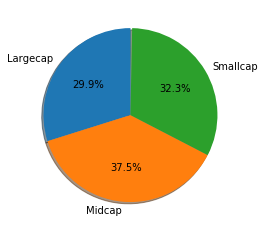

In [72]:
fig1, ax1 = plt.subplots()
ax1.pie(distribution.iloc[973,0:3].values, labels=distribution.columns[0:3], autopct='%1.1f%%',
        shadow=True, startangle=90);

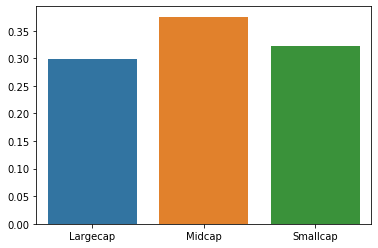

In [73]:
sns.barplot(distribution.columns[0:3], distribution.iloc[973,0:3].values)